<a href="https://colab.research.google.com/github/vishalbhardwaj546/Digital-Guitar-Effects/blob/master/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull


##### **Answer 1.1**

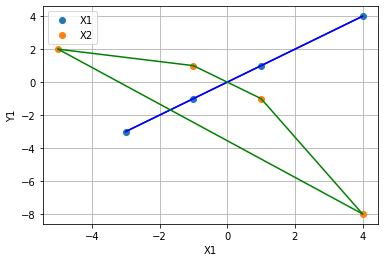

In [58]:
X1 = np.array([[-1,-1],[1,1],[-3,-3],[4,4]])
X2 = np.array([[-1,1],[1,-1],[-5,2],[4,-8]])

#Defining hulls for both the sets.
hullX1 = ConvexHull(X1, qhull_options='QJ')
hullX2 = ConvexHull(X2, qhull_options='QJ')

#Plotting Points
plt.plot(X1[:,0],X1[:,1],'o', label='X1')
plt.plot(X2[:,0],X2[:,1],'o', label='X2')

#Plotting hulls
for simplex in hullX1.simplices:
  plt.plot(X1[simplex,0],X1[simplex,1],color='blue')

for simplex in hullX2.simplices:
  plt.plot(X2[simplex,0],X2[simplex,1], color='green')

plt.legend()
plt.xlabel('X1')
plt.ylabel('Y1')
plt.grid()



From the above plot, we can clearly see that the intersection of the two hulls is not empty. Therefore, we can conclude that X1 and X2 are not linearly inseparable. <br>
No, a linear classifier can not be trained on the two features on this data set as is.

##### **Answer 1.2**

We can define the new set 'z' such that (x_new,y_new) in z where x_new and y_new are (x*y) where (x,y) is an element in either X1 or X2.


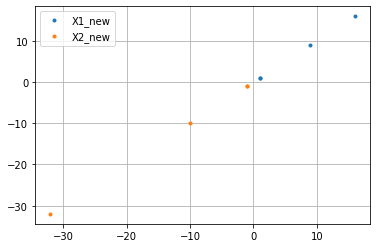

In [59]:
#New representation with linearly separable elements
X1_new = np.array([[1,1],[1,1],[9,9],[16,16]])
X2_new = np.array([[-1,-1],[-1,-1],[-10,-10],[-32,-32]])

#Plotting new points
plt.plot(X1_new[:,0],X1_new[:,1],'.', label='X1_new')
plt.plot(X2_new[:,0],X2_new[:,1],'.', label='X2_new')
plt.legend()
plt.grid()

##### **Answer 1.3**

x+y=0 is the separating hyperplane.

##### **Answer 1.4**

Nonlinear transformations allow the user to convert linearly inseparable data points to a new set of data which is linearly separable.


### **Question 2**

##### **Answer 2.1**

To prove,

$MSE = Bias^{2} + Variance + Noise$


We know,

$MSE = E[(f(x) + \epsilon - g(x))^2]$

Where g(x) is the estimate of f(x), which is $\hat{f}(x)$.

We can expand the expression for MSE as 

$MSE = E[\epsilon^2] + E[(f(x) - g(x))^2]  + E[2ϵ(f(x) - g(x))]$

Since $E[\epsilon]$ is 0, the last term is equal to 0.

If we add and subtract $E[g(x)]$ in the second term

$MSE = E[ϵ^2] + E[(f(x) - E[g(x)] -(g(x)-E[g(x)]))^2]$

$MSE = E[ϵ^2] + E[((f(x) - E[g(x)])^2] + E[(g(x)-E[g(x)])^2] - 2*E[(f(x)-E[g(x)])]\\*E[(g(x)-E[g(x)])] $ 



$Since E[(g(x)-E[g(x)])] = 0,$

$MSE = E[ϵ^2] + E[((f(x) - E[g(x)])^2] + E[(g(x)-E[g(x)])^2]$

Here,

$ E[ϵ^2]=Noise $

$ E[((f(x) - E[g(x)])^2]=Bias^2 $

$ E[(g(x)-E[g(x)])^2]=Variance $

Therefore, we can conclude that,

$MSE = Bias^{2} + Variance + Noise$

**Answer 2.2**

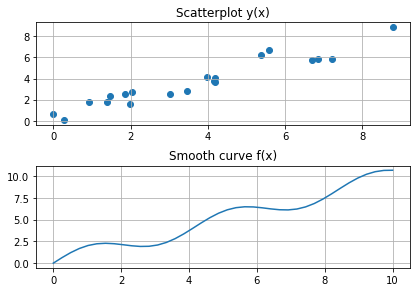

In [60]:
np.random.seed(1)

#Defining y(x)
x = 10*np.random.random(20)
x=np.sort(x)
noise = np.random.normal(0,np.sqrt(0.3),20)
y = x + np.sin(1.5*x) + noise

#Defining smooth f(x)
xf = np.linspace(0,10,40)
f = xf + np.sin(1.5*xf)

#Defining subplots design
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=2)

#Plotting y(x) - Scatterplot
plt.subplot(2,1,1)
plt.title('Scatterplot y(x)')
plt.scatter(x,y)
plt.grid()

#Plotting f(x) - Smooth Curve
plt.subplot(2,1,2)
plt.title('Smooth curve f(x)')
plt.plot(xf,f)
plt.grid()


**Answer 2.3**

g1(x) Coefficients: [0.87205757 0.48472644]
g3(x) Coefficients: [ 0.00620308 -0.0709917   1.06573676  0.40740593]
g10(x) Coefficients: [ 1.52632011e-05 -7.97375574e-04  1.70953856e-02 -1.98799302e-01
  1.38688570e+00 -6.03079145e+00  1.63323755e+01 -2.63231436e+01
  2.22728795e+01 -6.27264403e+00  6.17356897e-01]


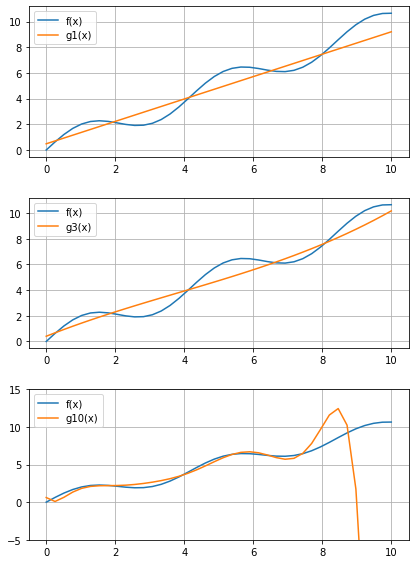

In [61]:
#Defining estimator functions - g1, g3, g10

g1=np.polyfit(x,y,1)
g3=np.polyfit(x,y,3)
g10=np.polyfit(x,y,10)

#Polynomial coefficients
print('g1(x) Coefficients:',g1)
print('g3(x) Coefficients:',g3)
print('g10(x) Coefficients:',g10)


xg = np.linspace(0,10,40)
val1 = np.array([xg**1, xg**0])
val3 = np.array([xg**3, xg**2, xg**1, xg**0])
val10 = np.array([xg**10, xg**9, xg**8, xg**7, xg**6, xg**5, xg**4, xg**3, xg**2, xg**1, xg**0])

#Fitted values
g1_val = np.dot(g1,val1)
g3_val = np.dot(g3,val3)
g10_val = np.dot(g10,val10)

#Defining subplots design
fig, ax = plt.subplots(3, 1, figsize=(6,8))
fig.tight_layout(h_pad=2)

#Comparing g1(x) and f(x) on plot
plt.subplot(3,1,1)
plt.plot(xf,f,label='f(x)')
plt.plot(xg,g1_val,label='g1(x)')
plt.legend()
plt.grid()

#Comparing g3(x) and f(x) on plot
plt.subplot(3,1,2)
plt.plot(xf,f,label='f(x)')
plt.plot(xg,g3_val,label='g3(x)')
plt.legend()
plt.grid()

#Comparing g10(x) and f(x) on plot
plt.subplot(3,1,3)
plt.plot(xf,f,label='f(x)')
plt.plot(xg,g10_val,label='g10(x)')
plt.ylim(-5, 15)
plt.legend()
plt.grid()

We can see that $g_{10}(x)$ is overfitting. There are no signs of underfitting in $g_1(x), g_3(x)$. Also, $g_3(x)$ is less underfitting than $g_1(x)$.

**Answer 2.4**

In [62]:
def f(x):
    return x + np.sin(x * 1.5)

def epsilon(n):
    return np.random.normal(loc=0, scale=0.3, size=n)

def y(x):
    return f(x) + epsilon(len(x))

In [63]:
def error_function(pred, actual):
  return (pred-actual)**2

In [64]:
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

n_datasets = 100
n_observations_per_dataset = 50
percent_train = .8
model_poly_degrees = range(1, 16)

n_train = int(np.ceil(n_observations_per_dataset * percent_train))


theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

for i in range(n_datasets):

  # create x_train and x_test
  x = np.random.random_sample(n_observations_per_dataset) * 10
  x_train = x[:n_train]
  x_test = x[n_train:]

  # Simulate training/testing targets
  y_train = y(x_train)
  y_test = y(x_test)


  #Looping over model degrees
  for deg in model_poly_degrees:

    # Training model
    tmp_theta_hat = np.polyfit(x_train, y_train, deg)

    # Making predictions on train set
    tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
    pred_train[deg].append(tmp_pred_train)

    # Test Predictions
    tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
    pred_test[deg].append(tmp_pred_test)

    # Mean Squared Error for train and test sets
    train_errors[deg].append(np.mean(error_function(tmp_pred_train, y_train)))
    test_errors[deg].append(np.mean(error_function(tmp_pred_test, y_test)))


In [65]:
def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(X_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0) 

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)

In [66]:
complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

In [67]:
best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]
print(f"the best model is of degree {best_model_degree}")

the best model is of degree 8


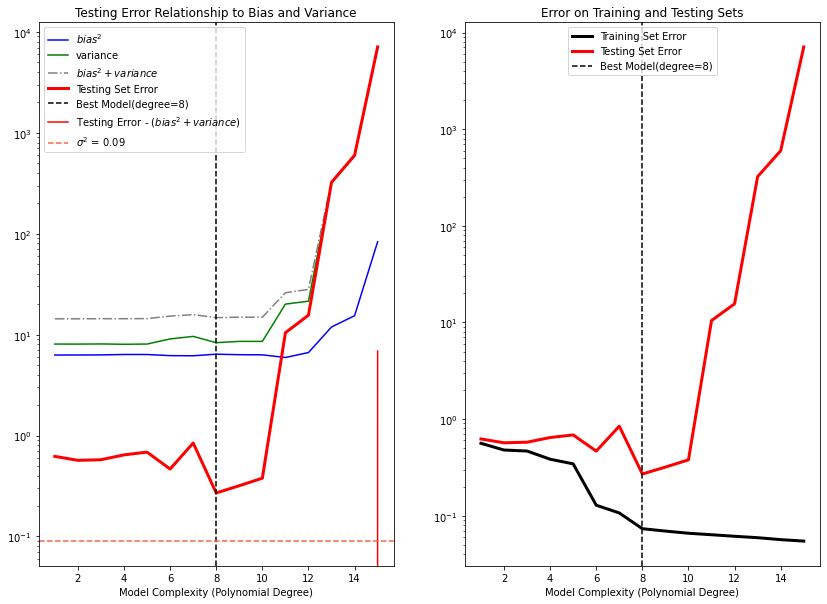

In [68]:
NOISE_STD = 0.3
DATA_COLOR = 'black'
ERROR_COLOR = 'red'

# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'$\sigma^2$ = {round(NOISE_STD**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.yscale('log')
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')
plt.yscale('log')


**Answer 2.5**


For non-regularized metrics,


In [69]:
print("Non regularized, degree 10, MSE train: ", complexity_train_error[9])
print("Non regularized, degree 10, MSE test: ", complexity_test_error[9])
print("Non regularized, degree 10, Bias Squared: ", bias_squared[9])
print("Non regularized, degree 10, variance: ", variance[9])

Non regularized, degree 10, MSE train:  0.06580246113782197
Non regularized, degree 10, MSE test:  0.378183195002633
Non regularized, degree 10, Bias Squared:  6.307856345633743
Non regularized, degree 10, variance:  8.568358440490218


In [70]:
def L2_reg_error_function(pred, actual, weights, l=100):
    squared_error = (pred - actual) ** 2
    regularization_error = l * np.sum(weights ** 2)
    return squared_error + regularization_error


In [71]:
pred_train = []
pred_test = []
train_errors = []
test_errors = []

In [72]:

for dataset in range(n_datasets):
    
    # create x_train and x_test
    x = np.random.random_sample(n_observations_per_dataset) * 10
    x_train = x[:n_train]
    x_test = x[n_train:]

    # Simulate training/testing targets
    y_train = y(x_train)
    y_test = y(x_test)

    # Train model
    tmp_theta_hat = np.polyfit(x_train, y_train, 10)
    
    # Make predictions on train set
    tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
    pred_train.append(tmp_pred_train)
    
    # Test predictions
    tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
    pred_test.append(tmp_pred_test)
    
    # Mean Squared Error + L2 regularization for train and test sets
    train_errors.append(np.mean(L2_reg_error_function(tmp_pred_train, y_train, tmp_theta_hat)))
    test_errors.append(np.mean(L2_reg_error_function(tmp_pred_test, y_test, tmp_theta_hat)))

In [73]:
complexity_train_error = np.mean(train_errors)
complexity_test_error = np.mean(test_errors)
bias_squared = calculate_estimator_bias_squared(pred_test)
variance = calculate_estimator_variance(pred_test)

In [74]:
print("Regularized, degree 10, MSE train: ", complexity_train_error)
print("Regularized, degree 10, MSE test: ", complexity_test_error)
print("Regularized, degree 10, Bias Squared: ", bias_squared)
print("Regularized, degree 10, variance: ", variance)

Regularized, degree 10, MSE train:  383550.00665523025
Regularized, degree 10, MSE test:  383551.6576898314
Regularized, degree 10, Bias Squared:  6.769189013500166
Regularized, degree 10, variance:  10.454867361852385


After regularization, the delta between training and test MSE is negligible as compared to the unregualrized model. Bias has slightly increased while variance has slightly reduced.

### **Question 3**


**Answer 3.1**

Dataset 1 : Phoneme; Dataset 2 : Balance_scale

Dataset 1 has 5404 instances, 6 features, 2 classes, 5 numerical features and 1 categorical

Dataset 2 has 625 instances, 5 features, 3 classes, 4 numerical features and 1 categorical



In [75]:
from google.colab import files
uploaded = files.upload()

Saving balance_scale.csv to balance_scale.csv
Saving phoneme.csv to phoneme.csv


In [78]:
dataset1 = pd.read_csv('phoneme.csv')
dataset2 = pd.read_csv('balance_scale.csv')

In [79]:
dataset1.head()


,id,V1,V2,V3,V4,V5,Class
0,1,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,1
1,2,-0.641265,0.109245,0.292130,-0.916804,0.240223,1
2,3,0.870593,-0.459862,0.578159,0.806634,0.835248,1
3,4,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,1
4,5,-0.596399,0.015938,2.043206,-1.688448,-0.948127,1


In [80]:

dataset2.head()

,id,'left-weight','left-distance','right-weight','right-distance','class'
0,1,1,1,1,1,B
1,2,1,1,1,2,R
2,3,1,1,1,3,R
3,4,1,1,1,4,R
4,5,1,1,1,5,R


**Answer 3.2**

Dataset 1


In [81]:
y_1 = np.array(dataset1['Class'])
dataset1.drop(columns=['Class'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(dataset1, y_1, test_size=0.20)

In [82]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

size = np.arange(0.1,1,0.1)

clf = RandomForestClassifier()
rf_training_time_dataset1 = []
rf_accuracy_dataset1 = []

#Using subsamples of training set for training the classifier
for i in size:
  #Creating subsamples of training set
  X_train_rf_dataset1, X_test_rf_dataset1, y_train_rf_dataset1, y_test_rf_dataset1 = train_test_split(X_train, y_train, train_size=i)
  
  #Training models based on subsamples
  start=time.time()
  clf.fit(X_train_rf_dataset1, y_train_rf_dataset1)
  stop=time.time()
  rf_training_time_dataset1.append((stop-start)*1000)

  #Predicting output
  y_predicted = clf.predict(X_test)
  rf_accuracy_dataset1.append(accuracy_score(y_test, y_predicted))  

  
#Using 100% of training set for training the classifier, 
start=time.time()
clf.fit(X_train, y_train)
stop=time.time()
rf_training_time_dataset1.append((stop-start)*1000)

#Predicting output
y_predicted = clf.predict(X_test)
rf_accuracy_dataset1.append(accuracy_score(y_test, y_predicted))

In [83]:
#Gradient Descent
from sklearn.ensemble import GradientBoostingClassifier

gboostclf = GradientBoostingClassifier(random_state=1)
gb_training_time_dataset1 = []
gb_accuracy_dataset1 = []

#Using subsamples of training set for training the classifier
for i in size:
  #Creating subsamples of training set
  X_train_gb_dataset1, X_test_gb_dataset1, y_train_gb_dataset1, y_test_gb_dataset1 = train_test_split(X_train, y_train, train_size=i)
  
  #Training models based on subsamples
  start=time.time()
  gboostclf.fit(X_train_gb_dataset1, y_train_gb_dataset1)
  stop=time.time()
  gb_training_time_dataset1.append((stop-start)*1000)

  #Predicting output
  y_predicted = gboostclf.predict(X_test)
  gb_accuracy_dataset1.append(accuracy_score(y_test, y_predicted))


#Using 100% of training set for training the classifier, 
start=time.time()
gboostclf.fit(X_train, y_train)
stop=time.time()
gb_training_time_dataset1.append((stop-start)*1000)

#Predicting output
y_predicted = gboostclf.predict(X_test)
gb_accuracy_dataset1.append(accuracy_score(y_test, y_predicted))

Dataset 2

In [84]:
y_2 = np.array(dataset2['\'class\''])
dataset2.drop(columns=['\'class\''], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(dataset2, y_2, test_size=0.20)

In [87]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

size = np.arange(0.1,1,0.1)

clf = RandomForestClassifier()
rf_training_time_dataset2 = []
rf_accuracy_dataset2 = []

#Using subsamples of training set for training the classifier
for i in size:
  #Creating subsamples of training set
  X_train_rf_dataset2, X_test_rf_dataset2, y_train_rf_dataset2, y_test_rf_dataset2 = train_test_split(X_train, y_train, train_size=i)
  
  #Training models based on subsamples
  start=time.time()
  clf.fit(X_train_rf_dataset2, y_train_rf_dataset2)
  stop=time.time()
  rf_training_time_dataset2.append((stop-start)*1000)

  #Predicting output
  y_predicted = clf.predict(X_test)
  rf_accuracy_dataset2.append(accuracy_score(y_test, y_predicted))  

#Using 100% of training set for training the classifier, 
start=time.time()
clf.fit(X_train, y_train)
stop=time.time()
rf_training_time_dataset2.append((stop-start)*1000)

#Predicting output
y_predicted = clf.predict(X_test)
rf_accuracy_dataset2.append(accuracy_score(y_test, y_predicted))

In [88]:
#Gradient Descent
from sklearn.ensemble import GradientBoostingClassifier

gboostclf = GradientBoostingClassifier(random_state=1)
gb_training_time_dataset2 = []
gb_accuracy_dataset2 = []

#Using subsamples of training set for training the classifier
for i in size:
  #Creating subsamples of training set
  X_train_gb_dataset2, X_test_gb_dataset2, y_train_gb_dataset2, y_test_gb_dataset2 = train_test_split(X_train, y_train, train_size=i)
  
  #Training models based on subsamples
  start=time.time()
  gboostclf.fit(X_train_gb_dataset2, y_train_gb_dataset2)
  stop=time.time()
  gb_training_time_dataset2.append((stop-start)*1000)

  #Predicting output
  y_predicted = gboostclf.predict(X_test)
  gb_accuracy_dataset2.append(accuracy_score(y_test, y_predicted))



#Using 100% of training set for training the classifier, 
start=time.time()
gboostclf.fit(X_train, y_train)
stop=time.time()
gb_training_time_dataset2.append((stop-start)*1000)

#Predicting output
y_predicted = gboostclf.predict(X_test)
gb_accuracy_dataset2.append(accuracy_score(y_test, y_predicted))


## **Plotting**

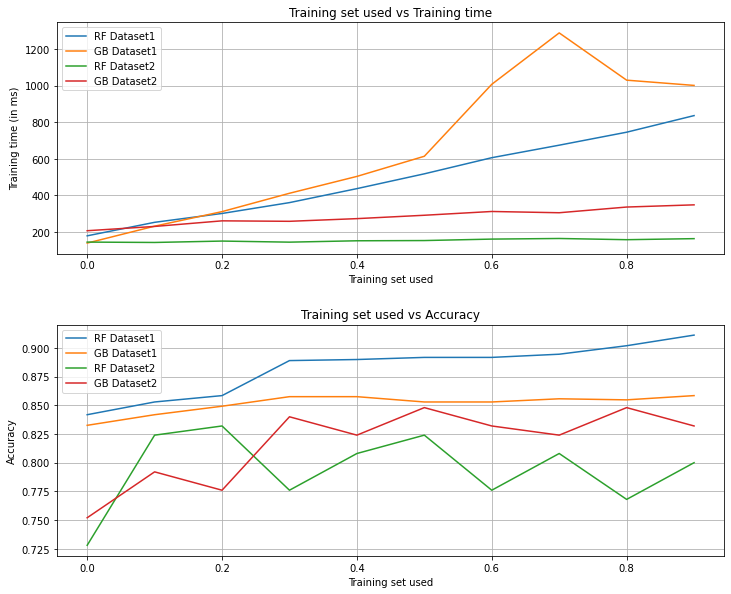

In [89]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
fig.tight_layout(h_pad=5)

x_size = np.arange(0.0,1,0.1)

#Plotting test size vs training time for random forest and gradient boosting on two datasets.
plt.subplot(2,1,1)
plt.title('Training set used vs Training time')

plt.plot(x_size,rf_training_time_dataset1,label='RF Dataset1')
plt.plot(x_size,gb_training_time_dataset1,label='GB Dataset1')
plt.plot(x_size,rf_training_time_dataset2,label='RF Dataset2')
plt.plot(x_size,gb_training_time_dataset2,label='GB Dataset2')

plt.xlabel('Training set used')
plt.ylabel('Training time (in ms)')

plt.legend()
plt.grid()

#Plotting test size vs accuracy for random forest and gradient boosting on two datasets.
plt.subplot(2,1,2)
plt.title('Training set used vs Accuracy')

plt.plot(x_size,rf_accuracy_dataset1,label='RF Dataset1')
plt.plot(x_size,gb_accuracy_dataset1,label='GB Dataset1')
plt.plot(x_size,rf_accuracy_dataset2,label='RF Dataset2')
plt.plot(x_size,gb_accuracy_dataset2,label='GB Dataset2')

plt.xlabel('Training set used')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

**Answer 3.3**



Accuracy: Random forest has greater accuracy for both the data sets.

Training time: Gradient Boosting takes more training time for both datasets.

Observations: 

1) With the increase in training size, time taken for training is more. It's almost a linear relationship. 

2) Accuracy improves much better by increasing training set size for random forests consistently.

3) Accuracy hardly improves after $(x=0.6)$ while using Gradient boosting for both datasets.

4) The rate of increase of training time with respect to increase in training set size is more for Gradient Boosting as compared to Random Forest algorithms.


###**Problem 4**

Answer 1. 

**PR curve**: Precision v/s Recall. Precision = TP/(TP+FP); Recall=TP/(TP+FN)

**ROC Curve**: TPR v/s FPR. TPR = TP/(TP+FN); FPR = FP/(TN+FP).

True negative is irrelevant in plotting PR curve but is used to generate ROC curves. 

For any dataset and a given algorithm, both the ROC curve and PR curve contain the 'same points'. Every point on the ROC corresponds to a unique confusion matrix and all these points can be translated uniquely on the PR curve, that is, it is a one-to-one mapping. This is because, even though PR curve does not use TN values, the TN value for each point on PR point can be uniquely determined by using the other three values in the confusion matrix. Therefore, for every unique confusion matrix, a unique point can be plotted on ROC curve and PR curve and each point on ROC curve can be translated onto PR curve uniquely and vice-versa.

Answer 2.


In [90]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [92]:
dataset3 = pd.read_csv('diabetes.csv')

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# dataset1 = pd.read_csv('phoneme.csv')

y = np.array(dataset3['Outcome'])
dataset3.drop(columns=['Outcome'], inplace = True)

X_train, X_test, y_train, y_test = train_test_split(dataset3, y, test_size=0.2)

In [94]:
#Logistic Regression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
y_predicted_lr = lr_clf.predict(X_test)
y_scores_lr = lr_clf.decision_function(X_test)

lr_fpr, lr_tpr, lr_thresholds1 = roc_curve(y_test, y_scores_lr)
lr_precision, lr_recall, lr_threshold2 = precision_recall_curve(y_test, y_scores_lr)

In [95]:
#ADABoost

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
y_predicted_ab = ab_clf.predict(X_test)
y_scores_ab = ab_clf.decision_function(X_test)

ab_fpr, ab_tpr, ab_thresholds1 = roc_curve(y_test, y_scores_ab)
ab_precision, ab_recall, ab_threshold2 = precision_recall_curve(y_test, y_scores_ab)

In [96]:
#AllPositive Classifier line

fpr_ap, tpr_ap, thresholds_ap = roc_curve(y_test, np.ones(shape=y_test.shape), pos_label=1)
precision_ap, recall_ap, thresholds_ap = precision_recall_curve(y_test, np.ones(shape=y_test.shape), pos_label=1)


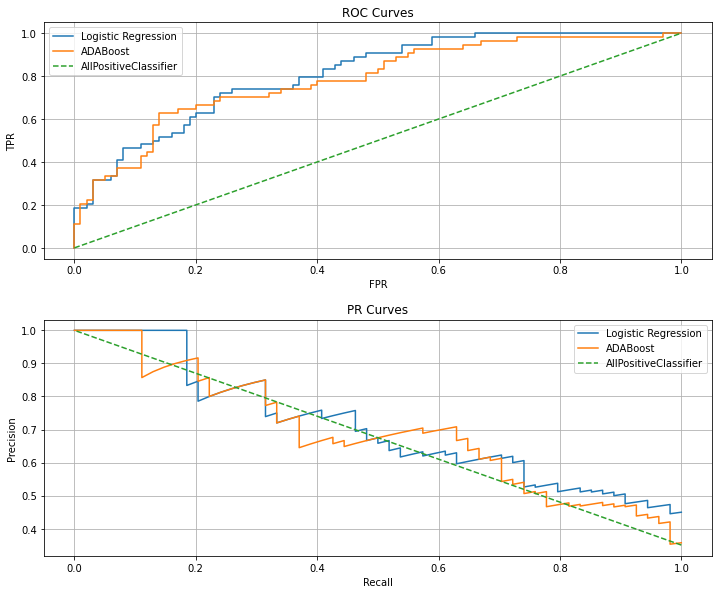

In [97]:
# Plotting ROC curves

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.tight_layout(h_pad=4)

plt.subplot(2,1,1)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(ab_fpr, ab_tpr, label='ADABoost')
plt.plot(fpr_ap, tpr_ap, label='AllPositiveClassifier', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('ROC Curves')
plt.legend()
plt.grid()

# Plotting PR curves

plt.subplot(2,1,2)
plt.plot(lr_recall, lr_precision, label='Logistic Regression')
plt.plot(ab_recall, ab_precision, label='ADABoost')
plt.plot(recall_ap, precision_ap, label='AllPositiveClassifier', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('PR Curves')
plt.legend()
plt.grid()

All positive classifier implies a classifier that classifies all the samples as positive. This implies TN and FN are 0. At such a point, TPR and FPR are equal to 1. Therefore, <br>
1) On ROC curve, all positive classifier is at $(1,1)$. <br>
2) On PR curve, an all positive classifier would be the point with Recall (which is TPR itself) equal to 1. $(1,0.4)$ is such point on the above PR curve plot.

**Answer 4.3**

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

#AUROC
ADABoost_AUROC = roc_auc_score(y_test, y_predicted_ab)
LR_AUROC = roc_auc_score(y_test, y_predicted_lr)

#AUPR
ADABoost_AUPR = auc(ab_recall, ab_precision)
LR_AUPR = auc(lr_recall, lr_precision)

#Printing values
print('ADABoost AUROC: ', ADABoost_AUROC)
print('Logistic Regression AUROC: ', LR_AUROC)
print('\n')
print('ADABoost AUPR: ', ADABoost_AUPR)
print('Logistic Regression AUPR: ', LR_AUPR)

ADABoost AUROC:  0.6572222222222222
Logistic Regression AUROC:  0.6864814814814816


ADABoost AUPR:  0.6895343847417814
Logistic Regression AUPR:  0.7071555300154646


In [104]:
#Calculating PR Gain
# !pip install pyprg
from prg import prg

ADABoost_PRGain_curve = prg.create_prg_curve(y_test, y_scores_ab)
ADABoost_PRGain = prg.calc_auprg(ADABoost_PRGain_curve)

LR_PRGain_curve = prg.create_prg_curve(y_test, y_scores_lr)
LR_PRGain = prg.calc_auprg(LR_PRGain_curve)

In [105]:
print('ADABoost PR Gain: ', ADABoost_PRGain)
print('Logistic Regression PR Gain: ', LR_PRGain)

ADABoost PR Gain:  0.6617770337723119
Logistic Regression PR Gain:  0.6950529773539966


Yes, PR gain curves are better than PR curves.  The PR gain curves make up for the PR curves traditional behavior to neglect True Negatives. It has been observed that the area under traditional PR curves can easily favour models with lower expected F1 score than others, whereas with PR Gain curves, the area enclosed is related to expected F1 score - on a harmonic scale - in a similar way as area under the ROC curve is related to accuracy.